# Tracer methods

Most of the tutorials use **fresnel.preview()** and **fresnel.pathtrace()** to render output images. This is a convenience API, and there are cases where it is not appropriate. To render many frames, such as in a movie or interactive visualization, use a **Tracer** directly to avoid overhead.

In [1]:
import fresnel
import math
from matplotlib import pyplot
%matplotlib inline
device = fresnel.Device()
scene = fresnel.Scene(device=device)
position = []
for i in range(6):
    position.append([2*math.cos(i*2*math.pi / 6), 2*math.sin(i*2*math.pi / 6), 0])

geometry = fresnel.geometry.Sphere(scene, position = position, radius=1.0)
geometry.material = fresnel.material.Material(solid=0.0, color=fresnel.color.linear([1,0.874,0.169])*0.9)
geometry.outline_width = 0.12
scene.camera = fresnel.camera.fit(scene, view='front', margin=0.2)

## Common Tracer operations

The **Tracer** must use the same device as the **Scenes** it renders. Each **Tracer** maintains an output image, and the width **w** and height **h** must be defined when the tracer is created.

In [2]:
tracer = fresnel.tracer.Preview(device=device, w=300, h=300)

### Rendering and accessing output images

The **render** method renders the output.

In [3]:
out = tracer.render(scene)

The return value of **render** is a proxy reference to the internal image buffer of the **Tracer**. You can access with a **numpy** array like interface.

In [4]:
out[100,100]

array([139, 121,  21, 255], dtype=uint8)

The output object also provides an interface for **jupyter** to display the image.

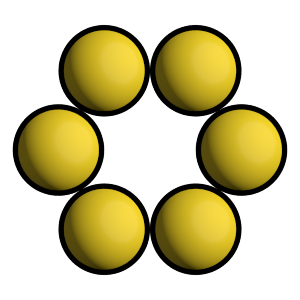

In [5]:
out

**tracer.output** also accesses the output buffer.

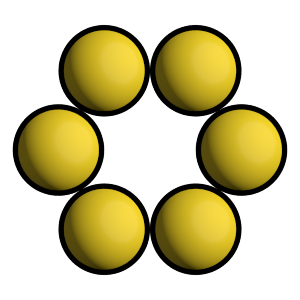

In [6]:
tracer.output

The tracer can render a modified scene without the initialization overhead.

In [7]:
scene.camera.up = (1,0,0)
tracer.render(scene);

After rendering, existing references to the output buffer will access the newly rendered image.

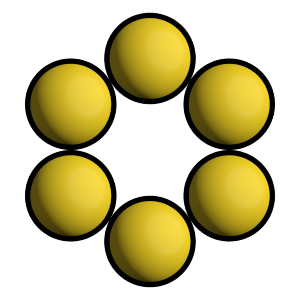

In [8]:
out

### Evaluate image exposure

Tracer provides several methods to evaluate image exposure. Enable highlight warnings to flag overexposed pixels in the output image.

In [9]:
tracer.enable_highlight_warning()

The test image is exposed correctly, there are no warning pixels.

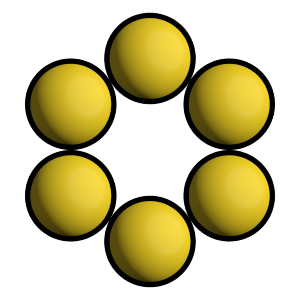

In [10]:
tracer.render(scene)

Make the main light brighter to show the highlight warnings.

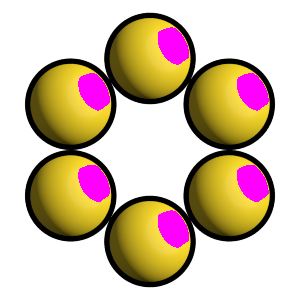

In [11]:
scene.lights[0].color = (1.2, 1.2, 1.2)
tracer.render(scene)

Tracer can also compute the image histogram to evaluate image exposure.

(-0.04794921875, 1.04990234375, 0, 400)

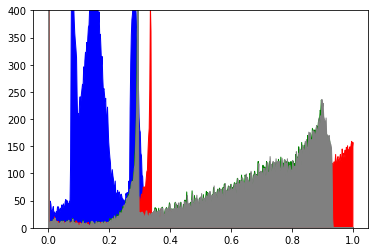

In [12]:
L, bins = tracer.histogram()
pyplot.fill_between(bins, L[:,3], color='blue');
pyplot.fill_between(bins, L[:,2], color='green');
pyplot.fill_between(bins, L[:,1], color='red');
pyplot.fill_between(bins, L[:,0], color='gray');
pyplot.axis(ymax=400, ymin=0)

In [13]:
tracer.disable_highlight_warning()

### Resizing the output buffer

Call **resize** to set a new size for the output. When the image is resized, any existing rendered output is lost.

In [14]:
tracer.resize(w=150, h=150)

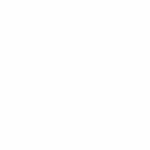

In [15]:
tracer.output

The next call to render will render into the new output size.

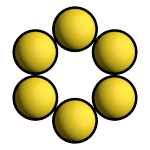

In [16]:
tracer.render(scene)

## The Preview tracer

The **Preview** tracer renders output images quickly with approximate lighting effects.

In [17]:
tracer = fresnel.tracer.Preview(device=device, w=300, h=300)

A different random number seed will result in different jittered anti-aliasing samples.

In [18]:
tracer.seed = 12

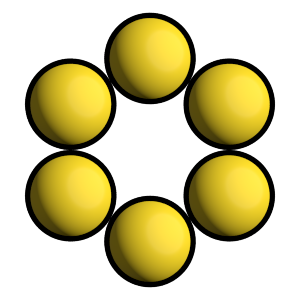

In [19]:
tracer.render(scene)

Here is a different scene rendered with the **Preview** tracer:

In [20]:
position = []
for k in range(5):
    for i in range(5):
        for j in range(5):
            position.append([2*i, 2*j, 2*k])
scene = fresnel.Scene(device)
scene.lights[1].theta = math.pi

geometry = fresnel.geometry.Sphere(scene, position = position, radius=1.0)
geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.1,0.1,0.4]),
                                              roughness=0.1,
                                              specular=1.0)

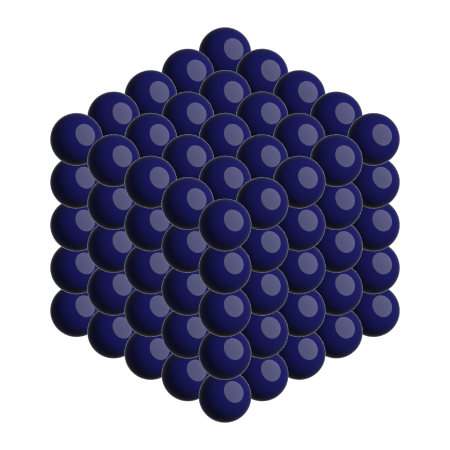

In [21]:
tracer.resize(w=450, h=450)
tracer.aa_level = 3
tracer.render(scene)

## The Path tracer

The **Path** tracer supports soft lighting, reflections, and other lighting effects.

Here is the same scene with the path tracer:

In [22]:
path_tracer = fresnel.tracer.Path(device=device, w=450, h=450)

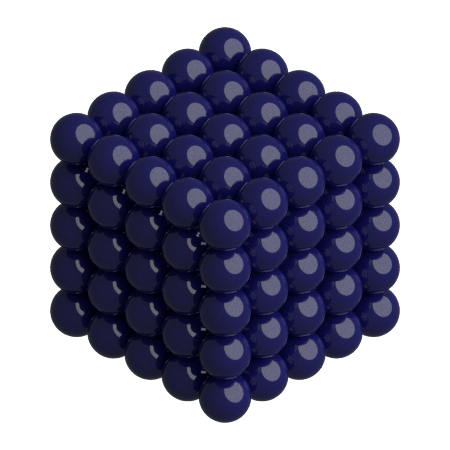

In [23]:
path_tracer.sample(scene, samples=64, light_samples=40)

The **Path** tracer performs many independent samples and averages them together. **reset()** starts averaging a new image.

In [24]:
path_tracer.reset()

**render()** accumulates a single sample into the resulting image.

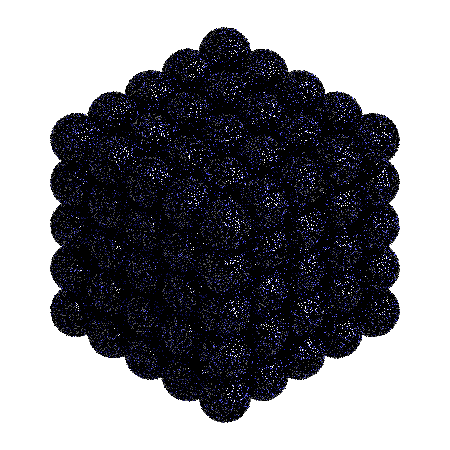

In [25]:
path_tracer.render(scene)

The resulting image is noisy, average many samples together to obtain a clean image.

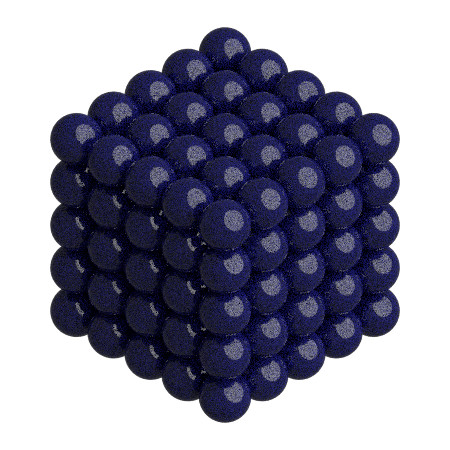

In [26]:
for i in range(64):
    path_tracer.render(scene)

path_tracer.output

This page was generated from a [jupyter](https://jupyter.org/) notebook. You can download and run the notebook locally from the [fresnel-examples](https://github.com/glotzerlab/fresnel-examples) repository.